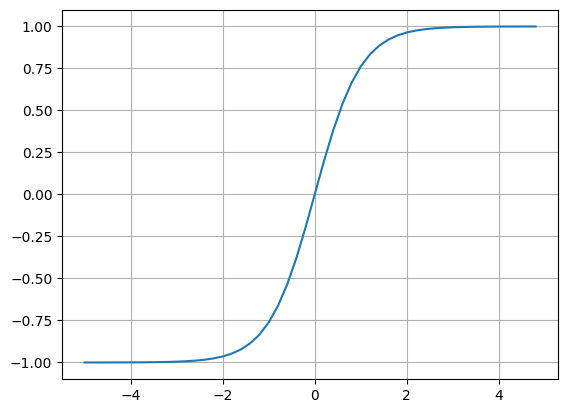

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()